# Thermal Decoherence of Aharonov–Bohm Oscillations in Topological Superconducting Edge Channels

---

## Overview

This project investigates **thermal decoherence of Aharonov–Bohm (AB) oscillations** in the helical edge state of a **2D topological superconductor (TSC)** pierced by magnetic flux. Using bosonization techniques and the **helical Luttinger liquid (HLL)** framework, we analytically derive how electron–electron interactions and finite temperature suppress quantum coherence in the system.

---

## Physical Setup

- The system is a **2D topological superconductor** with a central hole threaded by magnetic flux \\( \Phi \\).
- The boundary of the hole hosts **helical edge states**: 1D spin-momentum-locked channels.
- These edge states form a ring geometry where interference leads to **AB oscillations** in conductance.

---

## Theoretical Framework

We model the edge channel as an interacting 1D **Luttinger liquid**:

\\[
H = \frac{\hbar v}{2\pi} \int_0^L dx \left[ K (\partial_x \theta)^2 + \frac{1}{K} (\partial_x \phi)^2 \right]
\\]

- \\( \phi(x) \\): charge fluctuations  
- \\( \theta(x) \\): current (phase) fluctuations  
- \\( K \\): Luttinger parameter (interaction strength)  
- \\( K < 1 \\): repulsive interactions; \\( K > 1 \\): attractive

---

## AB Oscillation Amplitude

The **temperature-dependent amplitude** of AB oscillations is derived from the fermionic Green's function:

\\[
A(T) = \frac{1}{2\pi a} \left[ \frac{\pi a k_B T}{\hbar v \sinh\left( \frac{\pi L k_B T}{\hbar v} \right)} \right]^\alpha
\\]

where:

- \\( \alpha = \frac{1}{2} \left(K + \frac{1}{K} \right) - 1 \\)
- \\( a \\): short-distance cutoff  
- \\( L \\): ring circumference  
- \\( T \\): temperature  
- \\( v \\): velocity of edge modes

---

##  Temperature Behavior

###  Low Temperature Limit (\( T \ll T_\phi \)):

\\[
A(T) \approx \left( \frac{a}{L} \right)^\alpha
\\]

- Saturates to a constant
- **No thermal dephasing**

### High Temperature Limit (\( T \gg T_\phi \)):

\\[
A(T) \approx \frac{1}{L} \left( \frac{2\pi a}{L} \right)^\alpha \left( \frac{T}{T_\phi} \right)^\alpha e^{-\alpha T / T_\phi}
\\]

or equivalently:

\\[
A(T) \sim e^{-\alpha L / \ell_\phi}, \quad \text{where } \ell_\phi = \frac{\hbar v}{k_B T}
\\]

- **Exponential decay due to thermal decoherence**
- \\( \ell_\phi \\): thermal coherence length

---

## Final Result

The AB oscillation amplitude exhibits a **crossover** from a temperature-independent regime to an **exponentially suppressed regime** governed by:

\\[
\alpha = \frac{1}{2} \left(K + \frac{1}{K} \right) - 1
\\]

The interaction strength \\( K \\) controls both the amplitude and thermal dephasing rate.

---

## Significance

- Demonstrates how **topological protection is fragile at finite temperature**
- Reveals interplay between **interactions** and **thermal fluctuations**
- Offers predictive insights for **designing topological quantum interference devices**

---

## Key References

- [1] C. Wu et al., *Phys. Rev. Lett.* 96, 106401 (2006)  
- [2] T. Giamarchi, *Quantum Physics in One Dimension*, OUP (2003)  
- [6] C. Kane & M. Fisher, *Phys. Rev. Lett.* 68, 1220 (1992)  
- [7] Virtanen & Recher, *Phys. Rev. B* 83, 115332 (2011)  
- [8] Seelig & Büttiker, *Phys. Rev. B* 64, 245313 (2001)

---

## Author

**Shiva Heidari**  
Postdoctoral Researcher – Quantum Topological Systems  
July 2025


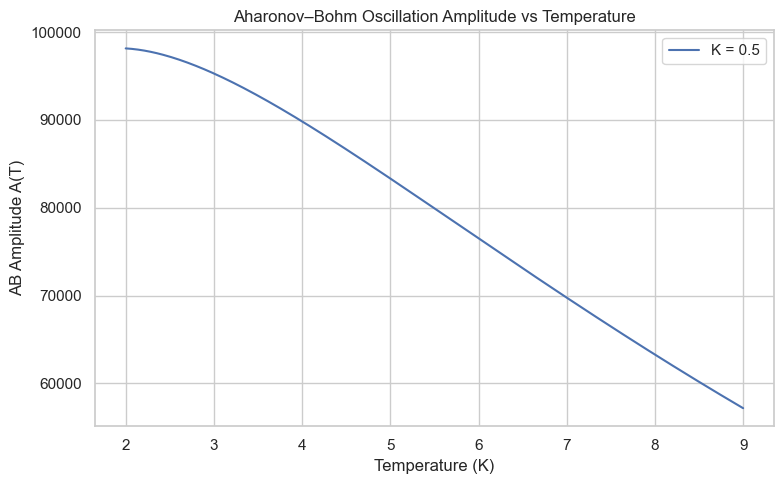

In [15]:
# Aharonov–Bohm Oscillation Amplitude vs Temperature (Real Units)

# --- Import libraries ---
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')

# --- Define physical constants ---
hbar = 6.582119569e-16     # reduced Planck constant in eV·s
kB = 8.617333262e-5        # Boltzmann constant in eV/K
v = 3e5                    # group velocity in m/s
L = 1.2e-6                 # ring circumference in meters
a = 0.1e-9                   # short-distance cutoff in meters

# Characteristic temperature scale
T_phi = hbar * v / (kB * L)  # in Kelvin

# --- Simulation parameters ---
K_values = [0.5]
T_vals = np.linspace(2, 9, 300)  # temperature range in K

# --- Compute A(T) ---
results = []
for K in K_values:
    alpha = 0.5 * (K + 1/K) - 1
    A_T = (1/L) * (2 * np.pi * a / L)**alpha * (T_vals / T_phi)**alpha * np.exp(-alpha * T_vals / T_phi)
    for T, A in zip(T_vals, A_T):
        results.append({"K": K, "T (K)": T, "A(T)": A})

# Create DataFrame
df = pd.DataFrame(results)

# --- Plotting ---
plt.figure(figsize=(8, 5))
for K in K_values:
    df_K = df[df['K'] == K]
    plt.plot(df_K['T (K)'], df_K['A(T)'], label=f'K = {K}')
    
plt.xlabel('Temperature (K)')
plt.ylabel('AB Amplitude A(T)')
plt.title('Aharonov–Bohm Oscillation Amplitude vs Temperature')
plt.legend()
plt.tight_layout()
plt.show()


/var/folders/1b/_h4_txrn1m77yhswwghpq9h40000gn/T/ipykernel_69921/2368061853.py:29: UserWarning: Glyph 8346 (\N{LATIN SUBSCRIPT SMALL LETTER P}) missing from font(s) Arial.
  plt.tight_layout()


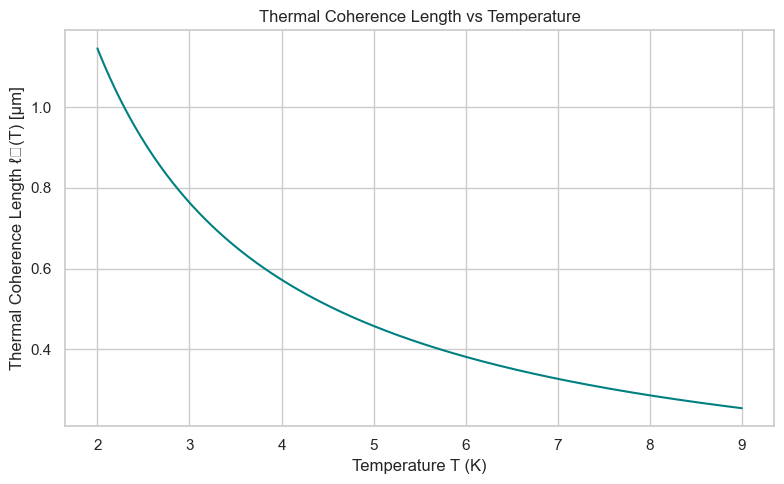

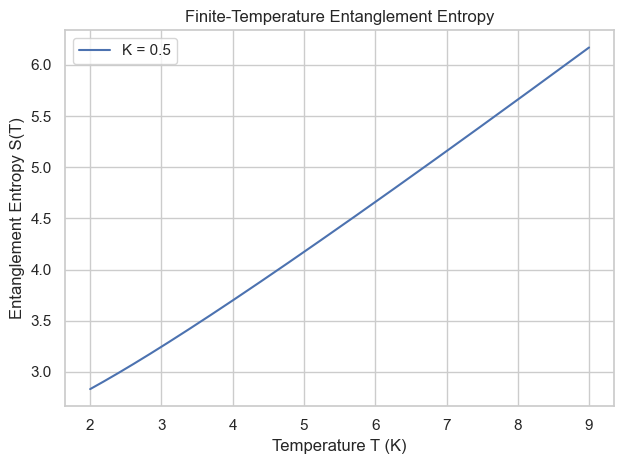

In [21]:
# Thermal Coherence Length and Entanglement Entropy vs Temperature

# --- Import Libraries ---
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# --- Constants ---
hbar = 6.582119569e-16       # eV⋅s
kB = 8.617333262e-5          # eV/K
v = 3e5                      # m/s
L = 1.2e-6                   # ring circumference in meters
a = 1e-9                     # short-distance cutoff in meters
c = 1                        # central charge for entanglement entropy

# --- Temperature and Interaction Parameters ---
T_vals = np.linspace(2, 9, 300)    # Temperature range in Kelvin
K_values = [0.5]         # Luttinger parameters

# --- Plot Thermal Coherence Length ℓ_φ(T) ---
l_phi_vals = hbar * v / (kB * T_vals)  # in meters

plt.figure(figsize=(8, 5))
plt.plot(T_vals, l_phi_vals * 1e6, color='teal')  # convert to microns for plot
plt.xlabel('Temperature T (K)')
plt.ylabel('Thermal Coherence Length ℓₚ(T) [μm]')
plt.title('Thermal Coherence Length vs Temperature')
plt.tight_layout()
plt.show()

# --- Plot Entanglement Entropy S(T) for different K values ---
for K in K_values:
    S_vals = []
    for T in T_vals:
        beta = 1 / (kB * T)
        argument = (beta * hbar * v) / (np.pi * a) * np.sinh(np.pi * L / (beta * hbar * v))
        S_T = (c / 3) * np.log(argument)
        S_vals.append(S_T)
    
    plt.plot(T_vals, S_vals, label=f'K = {K}')

plt.xlabel('Temperature T (K)')
plt.ylabel('Entanglement Entropy S(T)')
plt.title('Finite-Temperature Entanglement Entropy')
plt.legend()
plt.tight_layout()
plt.show()
